# Data Cleaning

In [1]:
#!pip install unidecode

In [66]:
import pandas as pd
import string
import numpy as np
from nltk.tokenize import word_tokenize
from datetime import datetime
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import unidecode
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

## instalacion NLTK

In [3]:
#!pip install nltk

## instalacion datetime

In [4]:
#!pip install datetime

In [5]:
pd.set_option('max_colwidth', 800) 
data = pd.read_csv("../QueEstaPasando/data/total.csv", index_col=0)
data.head()

,Unnamed: 0.1,text,created_at,author_id,id,neg,neu,pos,score
0,0,@MercantilBanco Buenas tardes intento abrir mi mercantil en línea y dice datos y clave incorrecta...está fallando la plataforma?,2021-04-28T22:47:36.000Z,202148873,1387539021983850497,0.994753,0.004321,0.000926,neg
1,1,@MercantilBanco Buenas tardes! En esta oportunidad les escribo para saber si hay problemas con la plataforma para realizar transferencias a otras cuentas mercantil ya que al momento de realizar una transferencia me arroja el mensaje de que intente más tardes!,2021-04-28T22:46:07.000Z,1274553941917863936,1387538646832648197,0.666402,0.328037,0.005561,neg
2,2,@MercantilBanco Deseo es reponer mi tarjeta de débito,2021-04-28T22:32:15.000Z,343710274,1387535156626526209,0.107078,0.886624,0.006298,neu
3,3,"@jesusmdbtw2012 @MercantilBanco Si lo está, estoy en la misma situación",2021-04-28T22:06:42.000Z,1323258072534552577,1387528726712311812,0.003918,0.989461,0.006621,neu
4,4,"El @MercantilBanco me quito 180.000 Bs por 4 mensajes de texto al 24024 solicitando clave temporal para un pago móvil, la cual nunca llego, son ladrones o no? https://t.co/bVVmvxfhjH",2021-04-28T21:48:28.000Z,1099360339207049218,1387524137904754689,0.996315,0.002650,0.001035,neg


In [6]:
data.shape

(4800, 9)

In [7]:
df_cleaning = data

In [8]:
df_cleaning.dtypes

Unnamed: 0.1      int64
text             object
created_at       object
author_id         int64
id                int64
neg             float64
neu             float64
pos             float64
score            object
dtype: object

## Remover duplicados  mover 1

In [9]:
df_cleaning.drop_duplicates(inplace=True)

In [10]:
df_cleaning.shape

(4798, 9)

## Revisar y Eliminar Null

In [11]:
df_cleaning.isna().sum()

Unnamed: 0.1    0
text            0
created_at      0
author_id       0
id              0
neg             0
neu             0
pos             0
score           0
dtype: int64

In [12]:
df_cleaning.dropna(axis=0, inplace=True)

In [13]:
df_cleaning.isna().sum()

Unnamed: 0.1    0
text            0
created_at      0
author_id       0
id              0
neg             0
neu             0
pos             0
score           0
dtype: int64

## Eliminar menciones

In [14]:
def remove_link(text):
    text = " ".join(filter(lambda x:x[0:4]!='http', text.split()))
    return text

In [15]:
# df_cleaning['text'] = df_cleaning['text'].apply(remove_link)
# df_cleaning.head()

In [16]:
def remove_mencion(text):
    text = " ".join(filter(lambda x:x[0]!='@', text.split()))
    return text

In [17]:
df_cleaning['text'] = df_cleaning['text'].apply(remove_mencion)
df_cleaning.head()

,Unnamed: 0.1,text,created_at,author_id,id,neg,neu,pos,score
0,0,Buenas tardes intento abrir mi mercantil en línea y dice datos y clave incorrecta...está fallando la plataforma?,2021-04-28T22:47:36.000Z,202148873,1387539021983850497,0.994753,0.004321,0.000926,neg
1,1,Buenas tardes! En esta oportunidad les escribo para saber si hay problemas con la plataforma para realizar transferencias a otras cuentas mercantil ya que al momento de realizar una transferencia me arroja el mensaje de que intente más tardes!,2021-04-28T22:46:07.000Z,1274553941917863936,1387538646832648197,0.666402,0.328037,0.005561,neg
2,2,Deseo es reponer mi tarjeta de débito,2021-04-28T22:32:15.000Z,343710274,1387535156626526209,0.107078,0.886624,0.006298,neu
3,3,"Si lo está, estoy en la misma situación",2021-04-28T22:06:42.000Z,1323258072534552577,1387528726712311812,0.003918,0.989461,0.006621,neu
4,4,"El me quito 180.000 Bs por 4 mensajes de texto al 24024 solicitando clave temporal para un pago móvil, la cual nunca llego, son ladrones o no? https://t.co/bVVmvxfhjH",2021-04-28T21:48:28.000Z,1099360339207049218,1387524137904754689,0.996315,0.002650,0.001035,neg


## Formateo de campo fecha

In [18]:
df_cleaning['created_at'] = pd.to_datetime(df_cleaning['created_at']) #lo hacemos un objeto tiempo
df_cleaning['created_at'] = df_cleaning['created_at'].dt.strftime("%Y-%m-%d") #tomo los elementos que quiero de ese objeto
df_cleaning['created_at'] = pd.to_datetime(df_cleaning['created_at']) #vuelvo a hacerlo un objeto datetime

df_cleaning.head()

,Unnamed: 0.1,text,created_at,author_id,id,neg,neu,pos,score
0,0,Buenas tardes intento abrir mi mercantil en línea y dice datos y clave incorrecta...está fallando la plataforma?,2021-04-28,202148873,1387539021983850497,0.994753,0.004321,0.000926,neg
1,1,Buenas tardes! En esta oportunidad les escribo para saber si hay problemas con la plataforma para realizar transferencias a otras cuentas mercantil ya que al momento de realizar una transferencia me arroja el mensaje de que intente más tardes!,2021-04-28,1274553941917863936,1387538646832648197,0.666402,0.328037,0.005561,neg
2,2,Deseo es reponer mi tarjeta de débito,2021-04-28,343710274,1387535156626526209,0.107078,0.886624,0.006298,neu
3,3,"Si lo está, estoy en la misma situación",2021-04-28,1323258072534552577,1387528726712311812,0.003918,0.989461,0.006621,neu
4,4,"El me quito 180.000 Bs por 4 mensajes de texto al 24024 solicitando clave temporal para un pago móvil, la cual nunca llego, son ladrones o no? https://t.co/bVVmvxfhjH",2021-04-28,1099360339207049218,1387524137904754689,0.996315,0.002650,0.001035,neg


## Remplaza palabra 't pago' por 'tpago'

In [19]:
df_cleaning['text'] = df_cleaning['text'].str.replace('t pago', 'tpago')
df_cleaning.head()

,Unnamed: 0.1,text,created_at,author_id,id,neg,neu,pos,score
0,0,Buenas tardes intento abrir mi mercantil en línea y dice datos y clave incorrecta...está fallando la plataforma?,2021-04-28,202148873,1387539021983850497,0.994753,0.004321,0.000926,neg
1,1,Buenas tardes! En esta oportunidad les escribo para saber si hay problemas con la plataforma para realizar transferencias a otras cuentas mercantil ya que al momento de realizar una transferencia me arroja el mensaje de que intente más tardes!,2021-04-28,1274553941917863936,1387538646832648197,0.666402,0.328037,0.005561,neg
2,2,Deseo es reponer mi tarjeta de débito,2021-04-28,343710274,1387535156626526209,0.107078,0.886624,0.006298,neu
3,3,"Si lo está, estoy en la misma situación",2021-04-28,1323258072534552577,1387528726712311812,0.003918,0.989461,0.006621,neu
4,4,"El me quito 180.000 Bs por 4 mensajes de texto al 24024 solicitando clave temporal para un pago móvil, la cual nunca llego, son ladrones o no? https://t.co/bVVmvxfhjH",2021-04-28,1099360339207049218,1387524137904754689,0.996315,0.002650,0.001035,neg


## Elimina los caracteres iniciales (espacios al principio) y finales (espacios al final)

In [20]:
df_cleaning['text'] = df_cleaning['text'].str.strip()
df_cleaning.head()

,Unnamed: 0.1,text,created_at,author_id,id,neg,neu,pos,score
0,0,Buenas tardes intento abrir mi mercantil en línea y dice datos y clave incorrecta...está fallando la plataforma?,2021-04-28,202148873,1387539021983850497,0.994753,0.004321,0.000926,neg
1,1,Buenas tardes! En esta oportunidad les escribo para saber si hay problemas con la plataforma para realizar transferencias a otras cuentas mercantil ya que al momento de realizar una transferencia me arroja el mensaje de que intente más tardes!,2021-04-28,1274553941917863936,1387538646832648197,0.666402,0.328037,0.005561,neg
2,2,Deseo es reponer mi tarjeta de débito,2021-04-28,343710274,1387535156626526209,0.107078,0.886624,0.006298,neu
3,3,"Si lo está, estoy en la misma situación",2021-04-28,1323258072534552577,1387528726712311812,0.003918,0.989461,0.006621,neu
4,4,"El me quito 180.000 Bs por 4 mensajes de texto al 24024 solicitando clave temporal para un pago móvil, la cual nunca llego, son ladrones o no? https://t.co/bVVmvxfhjH",2021-04-28,1099360339207049218,1387524137904754689,0.996315,0.002650,0.001035,neg


## Se Eliminan los Caracteres Especiales

👇 Remove punctuation and lower case the text.

In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
mi_puntuacion = '!¡"#$%&\'()*+,-./:;<=>¿?@[\\]^_`{|}~'

In [23]:
def remove_puntuation(text):
    for punctuation in mi_puntuacion:
        text = text.replace(punctuation, " ")
    return text

In [24]:
df_cleaning['text'] = df_cleaning['text'].apply(remove_puntuation)
df_cleaning.head()

,Unnamed: 0.1,text,created_at,author_id,id,neg,neu,pos,score
0,0,Buenas tardes intento abrir mi mercantil en línea y dice datos y clave incorrecta está fallando la plataforma,2021-04-28,202148873,1387539021983850497,0.994753,0.004321,0.000926,neg
1,1,Buenas tardes En esta oportunidad les escribo para saber si hay problemas con la plataforma para realizar transferencias a otras cuentas mercantil ya que al momento de realizar una transferencia me arroja el mensaje de que intente más tardes,2021-04-28,1274553941917863936,1387538646832648197,0.666402,0.328037,0.005561,neg
2,2,Deseo es reponer mi tarjeta de débito,2021-04-28,343710274,1387535156626526209,0.107078,0.886624,0.006298,neu
3,3,Si lo está estoy en la misma situación,2021-04-28,1323258072534552577,1387528726712311812,0.003918,0.989461,0.006621,neu
4,4,El me quito 180 000 Bs por 4 mensajes de texto al 24024 solicitando clave temporal para un pago móvil la cual nunca llego son ladrones o no https t co bVVmvxfhjH,2021-04-28,1099360339207049218,1387524137904754689,0.996315,0.002650,0.001035,neg


## Covierte en minusculas todo

In [25]:
def remove_lower(text1):
    text1 = text1.lower()
    return text1

In [26]:
df_cleaning['text'] = df_cleaning['text'].apply(remove_lower)
df_cleaning.head()

,Unnamed: 0.1,text,created_at,author_id,id,neg,neu,pos,score
0,0,buenas tardes intento abrir mi mercantil en línea y dice datos y clave incorrecta está fallando la plataforma,2021-04-28,202148873,1387539021983850497,0.994753,0.004321,0.000926,neg
1,1,buenas tardes en esta oportunidad les escribo para saber si hay problemas con la plataforma para realizar transferencias a otras cuentas mercantil ya que al momento de realizar una transferencia me arroja el mensaje de que intente más tardes,2021-04-28,1274553941917863936,1387538646832648197,0.666402,0.328037,0.005561,neg
2,2,deseo es reponer mi tarjeta de débito,2021-04-28,343710274,1387535156626526209,0.107078,0.886624,0.006298,neu
3,3,si lo está estoy en la misma situación,2021-04-28,1323258072534552577,1387528726712311812,0.003918,0.989461,0.006621,neu
4,4,el me quito 180 000 bs por 4 mensajes de texto al 24024 solicitando clave temporal para un pago móvil la cual nunca llego son ladrones o no https t co bvvmvxfhjh,2021-04-28,1099360339207049218,1387524137904754689,0.996315,0.002650,0.001035,neg


## Elimina Acentos

In [27]:
from unicodedata import normalize
def cambia_acentuadas(text):
    trans_tab = dict.fromkeys(map(ord, u'\u0301\u0308'), None)
    text = normalize('NFKC', normalize('NFKD', text).translate(trans_tab))
    return text

In [28]:
df_cleaning['text'] = df_cleaning['text'].apply(cambia_acentuadas)
df_cleaning.head()

,Unnamed: 0.1,text,created_at,author_id,id,neg,neu,pos,score
0,0,buenas tardes intento abrir mi mercantil en linea y dice datos y clave incorrecta esta fallando la plataforma,2021-04-28,202148873,1387539021983850497,0.994753,0.004321,0.000926,neg
1,1,buenas tardes en esta oportunidad les escribo para saber si hay problemas con la plataforma para realizar transferencias a otras cuentas mercantil ya que al momento de realizar una transferencia me arroja el mensaje de que intente mas tardes,2021-04-28,1274553941917863936,1387538646832648197,0.666402,0.328037,0.005561,neg
2,2,deseo es reponer mi tarjeta de debito,2021-04-28,343710274,1387535156626526209,0.107078,0.886624,0.006298,neu
3,3,si lo esta estoy en la misma situacion,2021-04-28,1323258072534552577,1387528726712311812,0.003918,0.989461,0.006621,neu
4,4,el me quito 180 000 bs por 4 mensajes de texto al 24024 solicitando clave temporal para un pago movil la cual nunca llego son ladrones o no https t co bvvmvxfhjh,2021-04-28,1099360339207049218,1387524137904754689,0.996315,0.002650,0.001035,neg


## Remueve Numeros

In [29]:
def remove_numbers(text1):
    text1 = ''.join(word for word in text1 if not word.isdigit())
    return text1

In [30]:
df_cleaning['text'] = df_cleaning['text'].apply(remove_numbers)
df_cleaning.head()

,Unnamed: 0.1,text,created_at,author_id,id,neg,neu,pos,score
0,0,buenas tardes intento abrir mi mercantil en linea y dice datos y clave incorrecta esta fallando la plataforma,2021-04-28,202148873,1387539021983850497,0.994753,0.004321,0.000926,neg
1,1,buenas tardes en esta oportunidad les escribo para saber si hay problemas con la plataforma para realizar transferencias a otras cuentas mercantil ya que al momento de realizar una transferencia me arroja el mensaje de que intente mas tardes,2021-04-28,1274553941917863936,1387538646832648197,0.666402,0.328037,0.005561,neg
2,2,deseo es reponer mi tarjeta de debito,2021-04-28,343710274,1387535156626526209,0.107078,0.886624,0.006298,neu
3,3,si lo esta estoy en la misma situacion,2021-04-28,1323258072534552577,1387528726712311812,0.003918,0.989461,0.006621,neu
4,4,el me quito bs por mensajes de texto al solicitando clave temporal para un pago movil la cual nunca llego son ladrones o no https t co bvvmvxfhjh,2021-04-28,1099360339207049218,1387524137904754689,0.996315,0.002650,0.001035,neg


## Separar palabras

In [31]:
def remove_StopWords(text):
    spanish_stopwords = set(stopwords.words('spanish'))
    #stop_words = set(stopwords.words('spanish'))
    word_tokens = word_tokenize(text) 
    text = [w for w in word_tokens if not w in spanish_stopwords]
    return text

In [32]:
df_cleaning['text'] = df_cleaning['text'].apply(remove_StopWords)
df_cleaning.head()

,Unnamed: 0.1,text,created_at,author_id,id,neg,neu,pos,score
0,0,"[buenas, tardes, intento, abrir, mercantil, linea, dice, datos, clave, incorrecta, fallando, plataforma]",2021-04-28,202148873,1387539021983850497,0.994753,0.004321,0.000926,neg
1,1,"[buenas, tardes, oportunidad, escribo, saber, si, problemas, plataforma, realizar, transferencias, cuentas, mercantil, momento, realizar, transferencia, arroja, mensaje, intente, mas, tardes]",2021-04-28,1274553941917863936,1387538646832648197,0.666402,0.328037,0.005561,neg
2,2,"[deseo, reponer, tarjeta, debito]",2021-04-28,343710274,1387535156626526209,0.107078,0.886624,0.006298,neu
3,3,"[si, misma, situacion]",2021-04-28,1323258072534552577,1387528726712311812,0.003918,0.989461,0.006621,neu
4,4,"[quito, bs, mensajes, texto, solicitando, clave, temporal, pago, movil, nunca, llego, ladrones, https, t, co, bvvmvxfhjh]",2021-04-28,1099360339207049218,1387524137904754689,0.996315,0.002650,0.001035,neg


## Lemmatizer

In [33]:
from nltk.stem import WordNetLemmatizer
def remove_Lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in text]
    str_lemmatizer = " ".join(lemmatized)
    return str_lemmatizer

In [34]:
df_cleaning['text'] = df_cleaning['text'].apply(remove_Lemmatize)
df_cleaning.head()

,Unnamed: 0.1,text,created_at,author_id,id,neg,neu,pos,score
0,0,buenas tardes intento abrir mercantil linea dice datos clave incorrecta fallando plataforma,2021-04-28,202148873,1387539021983850497,0.994753,0.004321,0.000926,neg
1,1,buenas tardes oportunidad escribo saber si problemas plataforma realizar transferencias cuentas mercantil momento realizar transferencia arroja mensaje intente ma tardes,2021-04-28,1274553941917863936,1387538646832648197,0.666402,0.328037,0.005561,neg
2,2,deseo reponer tarjeta debito,2021-04-28,343710274,1387535156626526209,0.107078,0.886624,0.006298,neu
3,3,si misma situacion,2021-04-28,1323258072534552577,1387528726712311812,0.003918,0.989461,0.006621,neu
4,4,quito b mensajes texto solicitando clave temporal pago movil nunca llego ladrones http t co bvvmvxfhjh,2021-04-28,1099360339207049218,1387524137904754689,0.996315,0.002650,0.001035,neg


In [35]:
df_cleaning.shape

(4798, 9)

## Definir Train y test

In [36]:
X = df_cleaning['text']
y = df_cleaning['score']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
X_train

692                                                                            quisiera saber monto renta poder saber monto recargar
358           descargado dinero rapido inconveniente genus nunca clave digital pesar tener correo numero telefono activo hagoooo s s
345    buenos dia queremos solucion pasado años dan respuesta poder utilizar divisas obtenidas dicom exigimos den pertenece solucion
339    buenos dia queremos solucion pasado años dan respuesta poder utilizar divisas obtenidas dicom exigimos den pertenece solucion
760                                       hola par correos revisar atencion cliente encuentro espera den solucion van me esperando 🙂
                                                                   ...                                                              
483                   numero cuenta numero cedula ci hoy salio cobro millon trecientos ochenta mil nota cargo dom http t co qiieavba
543         afectadosdicom dado respuesta oportuna divisas adquiridas

## Modelo Deep learning

In [39]:
#!pip install python-Levenshtein

You should consider upgrading via the '/home/juancarlosbt/.pyenv/versions/3.8.6/envs/QueEstaPasando/bin/python -m pip install --upgrade pip' command.


In [40]:
from gensim.models import Word2Vec
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences


# –– Step #1
def convert_sentences(X):
    return [sentence.split(' ') for sentence in X]

X_train_words = convert_sentences(X_train)
X_test_words = convert_sentences(X_test)


# –– Step #2
#word2vec = Word2Vec(sentences=X_train, min_count=10, window=10)
word2vec = Word2Vec(sentences=X_train_words, min_count=10, window=10)

# –– Step #3
def embed_sentence(word2vec, sentence):
    embedded_sentence = []
    for word in sentence:
        if word in word2vec.wv:
            embedded_sentence.append(word2vec.wv[word])
        
    return np.array(embedded_sentence)

def embedding(word2vec, sentences):
    embed = []
    
    for sentence in sentences:
        embedded_sentence = embed_sentence(word2vec, sentence)
        embed.append(embedded_sentence)
        
    return embed

X_train_embed = embedding(word2vec, X_train_words)
X_test_embed = embedding(word2vec, X_test_words)


# –– Step #4
X_train_pad = pad_sequences(X_train_embed, dtype='float32', padding='post')
X_test_pad = pad_sequences(X_test_embed, dtype='float32', padding='post')

In [41]:
y_train = y_train.map(lambda x : 2 if x == 'pos' else 1 if x == 'neu' else 0)

In [42]:
y_test = y_test.map(lambda x : 2 if x == 'pos' else 1 if x == 'neu' else 0)

In [43]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=3) #Convierte en categorical el train
y_test = to_categorical(y_test, num_classes=3) #Convierte en categorical el test

In [44]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

def init_model():
    model_dl = Sequential()
    model_dl.add(layers.Masking())
    model_dl.add(layers.LSTM(20, activation='tanh'))
    model_dl.add(layers.Dense(15, activation='relu'))
    model_dl.add(layers.Dense(3, activation='softmax'))

    model_dl.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    return model_dl

model_dl = init_model()

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=20, restore_best_weights=True)

model_dl.fit(X_train_pad, y_train, 
          batch_size = 16,
          epochs=1000,
          validation_split=0.3,
          callbacks=[es]
         )

Epoch 1/1000
147/147 [==============================] - 9s 29ms/step - loss: 0.8782 - accuracy: 0.5485 - val_loss: 0.7811 - val_accuracy: 0.6518
Epoch 2/1000
147/147 [==============================] - 3s 19ms/step - loss: 0.8162 - accuracy: 0.6035 - val_loss: 0.7665 - val_accuracy: 0.6627
Epoch 3/1000
147/147 [==============================] - 3s 18ms/step - loss: 0.8117 - accuracy: 0.5972 - val_loss: 0.7648 - val_accuracy: 0.6498
Epoch 4/1000
147/147 [==============================] - 3s 18ms/step - loss: 0.7871 - accuracy: 0.6247 - val_loss: 0.7706 - val_accuracy: 0.6369
Epoch 5/1000
147/147 [==============================] - 3s 19ms/step - loss: 0.7864 - accuracy: 0.6183 - val_loss: 0.7577 - val_accuracy: 0.6458
Epoch 6/1000
147/147 [==============================] - 3s 18ms/step - loss: 0.7945 - accuracy: 0.6035 - val_loss: 0.7556 - val_accuracy: 0.6607
Epoch 7/1000
147/147 [==============================] - 3s 18ms/step - loss: 0.7833 - accuracy: 0.6155 - val_loss: 0.7523 - val_ac

147/147 [==============================] - 3s 20ms/step - loss: 0.6943 - accuracy: 0.6506 - val_loss: 0.7367 - val_accuracy: 0.6835
Epoch 58/1000
147/147 [==============================] - 3s 19ms/step - loss: 0.7119 - accuracy: 0.6477 - val_loss: 0.7247 - val_accuracy: 0.6835
Epoch 59/1000
147/147 [==============================] - 3s 21ms/step - loss: 0.7132 - accuracy: 0.6406 - val_loss: 0.7286 - val_accuracy: 0.6815
Epoch 60/1000
147/147 [==============================] - 3s 21ms/step - loss: 0.7122 - accuracy: 0.6564 - val_loss: 0.7423 - val_accuracy: 0.6766
Epoch 61/1000
147/147 [==============================] - 3s 21ms/step - loss: 0.6750 - accuracy: 0.6778 - val_loss: 0.7378 - val_accuracy: 0.6577
Epoch 62/1000
147/147 [==============================] - 3s 21ms/step - loss: 0.6892 - accuracy: 0.6651 - val_loss: 0.7482 - val_accuracy: 0.6786
Epoch 63/1000
147/147 [==============================] - 3s 23ms/step - loss: 0.7091 - accuracy: 0.6513 - val_loss: 0.7195 - val_accuracy:

In [46]:
model_dl.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 27, 100)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 20)                9680      
_________________________________________________________________
dense (Dense)                (None, 15)                315       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 48        
Total params: 10,043
Trainable params: 10,043
Non-trainable params: 0
_________________________________________________________________


In [47]:
res = model_dl.evaluate(X_test_pad, y_test, verbose=0)
print(f'The accuracy evaluated on the test set is of {res[1]*100:.3f}%')

The accuracy evaluated on the test set is of 65.417%


In [48]:
df_model = pd.DataFrame(model_dl.predict(X_test_pad))
df_model.columns = ['neg','neu','pos']

In [49]:
df_model.head()

,neg,neu,pos
0,0.002097,0.997866,0.000037
1,0.192895,0.709070,0.098035
2,0.240470,0.607202,0.152328
3,0.555512,0.403009,0.041479
4,0.607351,0.361475,0.031174


## learning_curve

In [50]:
def init_model_2():
    model_dl2 = Sequential()
    model_dl2.add(layers.Masking())
    model_dl2.add(layers.LSTM(20, activation='tanh'))
    model_dl2.add(layers.Dense(15, activation='relu'))
    model_dl2.add(layers.Dense(3, activation='softmax'))

    model_dl2.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model_dl2

model_dl2 = init_model_2()

In [51]:

# Fit the model on the train data
history = model_dl2.fit(X_train_pad, y_train, 
          batch_size = 16,
          epochs=1000,
          validation_split=0.3,
          callbacks=[es]
         )

Epoch 1/1000
147/147 [==============================] - 8s 25ms/step - loss: 0.9394 - accuracy: 0.5072 - val_loss: 0.7971 - val_accuracy: 0.6369
Epoch 2/1000
147/147 [==============================] - 3s 19ms/step - loss: 0.8041 - accuracy: 0.6088 - val_loss: 0.7734 - val_accuracy: 0.6538
Epoch 3/1000
147/147 [==============================] - 3s 19ms/step - loss: 0.8041 - accuracy: 0.6099 - val_loss: 0.7677 - val_accuracy: 0.6478
Epoch 4/1000
147/147 [==============================] - 3s 19ms/step - loss: 0.8071 - accuracy: 0.6141 - val_loss: 0.7684 - val_accuracy: 0.6458
Epoch 5/1000
147/147 [==============================] - 3s 19ms/step - loss: 0.7802 - accuracy: 0.6180 - val_loss: 0.7650 - val_accuracy: 0.6558
Epoch 6/1000
147/147 [==============================] - 3s 19ms/step - loss: 0.7685 - accuracy: 0.6305 - val_loss: 0.8010 - val_accuracy: 0.5962
Epoch 7/1000
147/147 [==============================] - 3s 23ms/step - loss: 0.7939 - accuracy: 0.6218 - val_loss: 0.7629 - val_ac

In [52]:
res = model_dl2.evaluate(X_test_pad, y_test, verbose=0)
print(f'The accuracy evaluated on the test set is of {res[1]*100:.3f}%')

The accuracy evaluated on the test set is of 65.000%


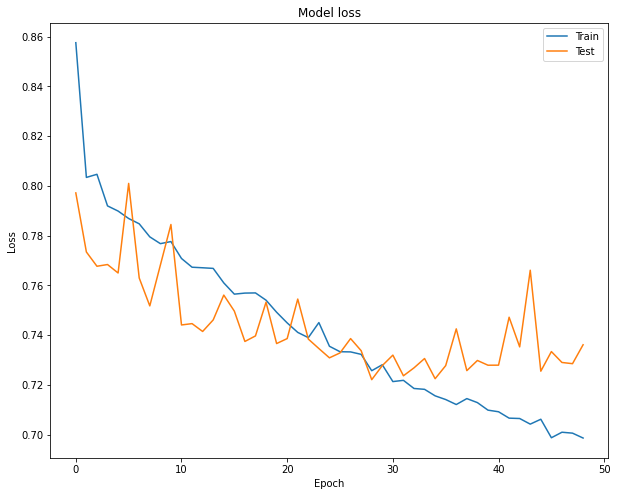

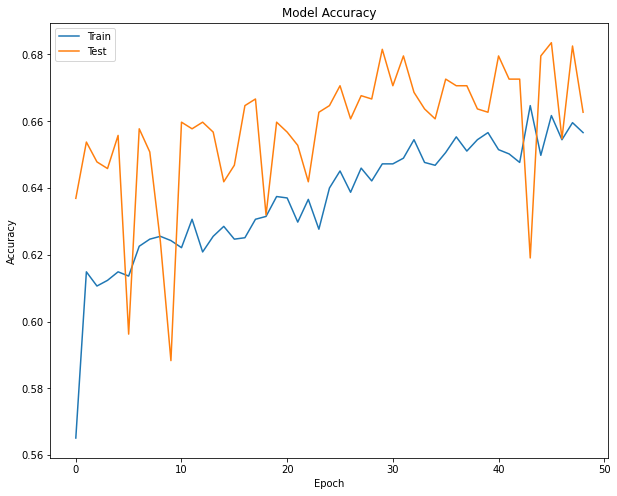

In [53]:
def plot_loss_accuracy(history):
    plt.subplots(figsize=(10,8))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.subplots(figsize=(10,8))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

plot_loss_accuracy(history)

In [54]:
res1 = model_dl2.evaluate(X_test_pad, y_test, verbose=0)
print(f'The accuracy evaluated on the test set is of {res1[1]*100:.3f}%')

The accuracy evaluated on the test set is of 65.000%


In [55]:
df_hist = pd.DataFrame(model_dl2.predict(X_test_pad))
df_hist.columns = ['neg','neu','pos']

In [56]:
df_hist

,neg,neu,pos
0,0.027020,0.972164,0.000815
1,0.168047,0.694042,0.137911
2,0.250147,0.553759,0.196094
3,0.697132,0.274457,0.028411
4,0.627285,0.337043,0.035672
...,...,...,...
1435,0.503549,0.303045,0.193406
1436,0.675948,0.284823,0.039229
1437,0.920227,0.075858,0.003915
1438,0.558559,0.395866,0.045575


<AxesSubplot:>

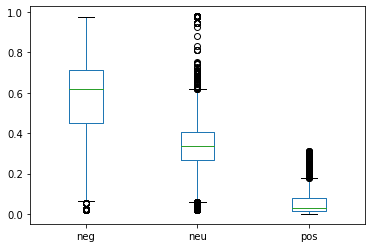

In [64]:
df_hist[['neg','neu','pos']].plot(kind='box')

<AxesSubplot:xlabel='pos'>

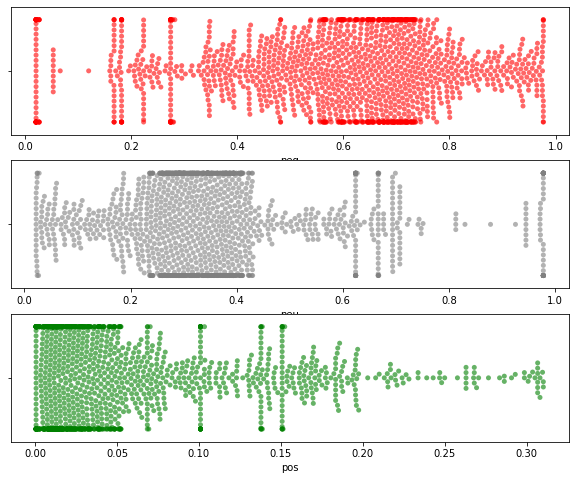

In [68]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (10,8))

sns.swarmplot(df_hist.neg , ax = ax[0], color = 'red', alpha = 0.6)
sns.swarmplot(df_hist.neu , ax = ax[1], color = 'grey', alpha = 0.6)
sns.swarmplot(df_hist.pos , ax = ax[2], color = 'green', alpha = 0.6)
